# ТМО РК №1 
### Шиленок Даниил Андреевич ИУ5-65Б
##### Вариант 20

|Номер варианта|Номер задачи|Номер набора данных, указанного в задаче|
|-|-|-|
|20|3|4|

Задача №3.
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

Для набора данных построить "парные диаграммы".

### Загрузка данных и первичный анализ

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data =  pd.read_csv("heart.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Парные диаграммы

Построим парные диаграммы для числовых полей датасета

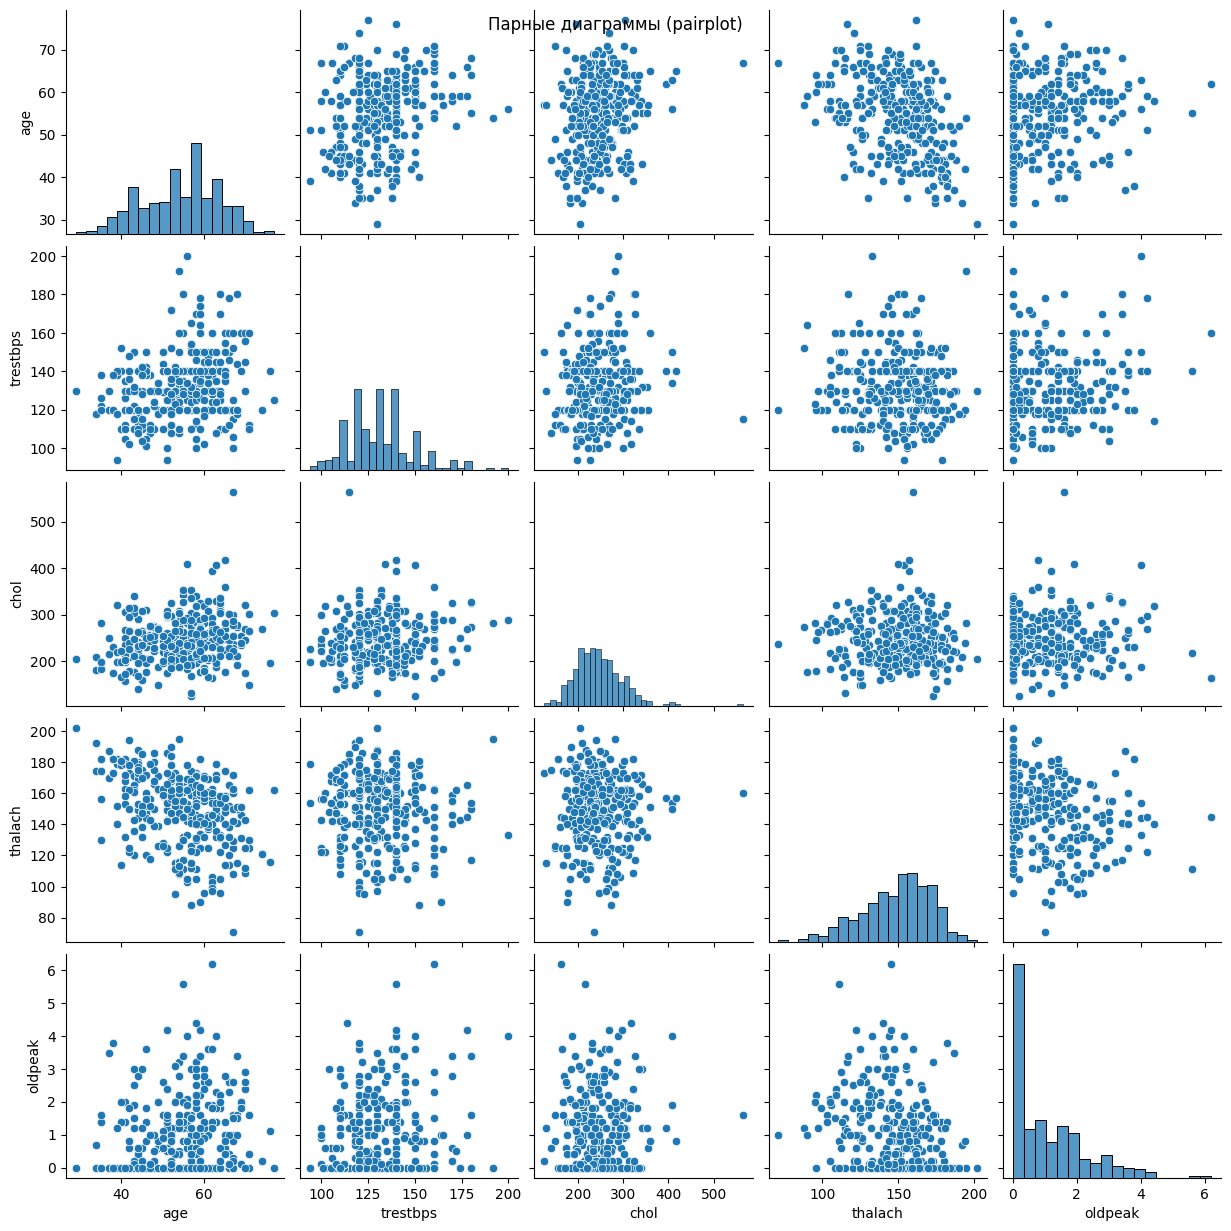

In [7]:
sns.pairplot(data[["age","trestbps","chol","thalach","oldpeak"]])
plt.suptitle("Парные диаграммы (pairplot)")
plt.show()

### Масштабирование данных

Произведём масштабирование данных колонки "chol" при помощи масштабирования данных на основе Z-оценки:

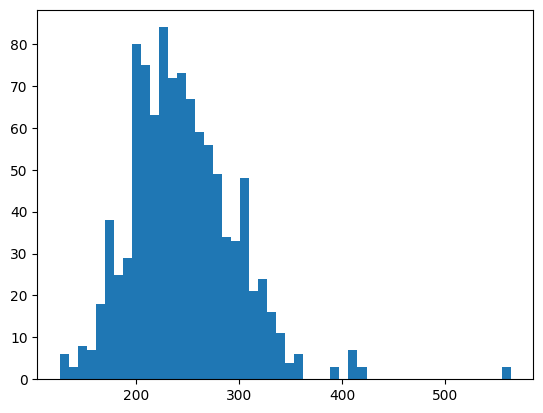

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[["chol"]])
plt.hist(data["chol"], 50)
plt.show()

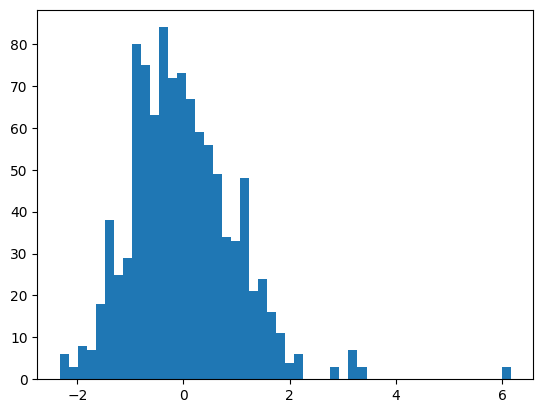

In [11]:
plt.hist(data_scaled, 50)
plt.show()

### Преобразование категориальных признаков в количественные

В нашем датасете категориальные признаки уже закодированы, поэтому для начала создам новый признак на основе возраста.
Установим следующие возрастные категории:
<br>
Child = (0, 12] <br>
Teen = (12, 18] <br>
Adult = (18, 45] <br>
Middle Aged = (45, 65] <br>
Eldery = (65, 120] <br>

In [ ]:
bins = [0, 12, 18, 45, 65, 120]
labels = ['Child', 'Teen', 'Adult', 'Middle Aged', 'Eldery']

# Создание категориального признака
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

print(data[["age", "age_group"]].head())

   age    age_group
0   52  Middle Aged
1   53  Middle Aged
2   70       Eldery
3   61  Middle Aged
4   62  Middle Aged
29 77


Преобразуем категориальный признак "age_group" в количественный с использованием двух методов: "Label encoding" и "One hot encoding"

#### Label encoding
Label Encoding — это метод преобразования категориальных признаков в числовые значения. Он присваивает каждой уникальной категории целое число. <br> Label Encoding вводит порядок между значениями, которого может не быть на самом деле.

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data["age_group"] = encoder.fit_transform(data["age_group"])


unique_rows_LE = data.drop_duplicates(subset="age_group")
print(unique_rows_LE)

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    52    1   0       125   212    0        1      168      0      1.0   
2    70    1   0       145   174    0        1      125      1      2.6   
11   43    0   0       132   341    1        0      136      1      3.0   

    slope  ca  thal  target  age_group  
0       2   2     3       0          2  
2       0   0     3       0          1  
11      1   0     3       0          0  


Как видим, было создано три группы, так как данные даны по людям от 29 до 77 лет:

In [20]:
print(min(data["age"]),max(data["age"]))

29 77


### One hot encoding

One-Hot Encoding — это метод кодирования категориальных признаков, при котором каждая уникальная категория превращается в отдельную бинарную колонку. <br> В отличие от Label Encoding, не вводит потенциально ложного порядка между значениями.

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
data_OHE = encoder.fit_transform(data[["age_group"]])
print(data_OHE.todense()[0:10])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


Как видим образовалось три столбца, кодирующих каждое уникальное значение признака